# 🍬 Real-Time Candy Detection With Calorie Tracking and Automated Checkout

## 🏷️ Introduction

This project presents a **smart object detection pipeline** powered by the **YOLOv8** deep learning model, designed to automatically **classify and detect 11 types of candies** in both images and videos. The main goal is to create a **virtual "smart cart"** that not only recognizes each candy but also keeps track of all candies detected, dynamically computing the **total price** and **caloric content** for a seamless and interactive retail experience.

---

### 🔍 What Does This Project Do?

- **Detects Candies:** Accurately identifies 11 different candy types in real time from various sources (images, live camera feeds, videos).
- **Tracks Selections:** Adds recognized candies to a "cart", ensuring that only stable, confirmed detections are counted.
- **Calculates Total:** Continuously updates and displays the total cost and calories based on candies detected.
- **Visualizes Results:** Overlays detection boxes, labels, and cart summaries right onto the video/image feeds for easy understanding.

---

### 🚀 Key Features

- **Model:** Utilizes Ultralytics' YOLOv8, a highly efficient, state-of-the-art object detection model.
- **Dataset:** Consists of labeled images featuring 11 candy varieties (e.g., M&Ms, Skittles, Airheads, etc.).
- **Environment:** Runs entirely in **Google Colab** for free GPU acceleration (Tesla T4), ensuring rapid training and inference.
- **User-Friendly:** Includes visual overlays, real-time stats, and interactive controls for practical usability.

---

### 📚 How It Works

1. **Setup:**
   - All code executes in Google Colab, leveraging free access to a Tesla T4 GPU.
   - Installation of required libraries including Ultralytics YOLOv8 and OpenCV.

2. **Detection Pipeline:**
   - **Input:** Accepts images, videos, webcam feeds, or entire image folders.
   - **YOLOv8 Model:** Loaded and used to make predictions frame-by-frame.
   - **Candy Metadata:** Maintains a lookup for price and calories for each candy type.
   - **Smart Tracking:** Uses a robust tracking mechanism to guarantee only consistent, stable detections are added to the cart.

3. **Visualization:**
   - **BBox & Labels:** Draws colored bounding boxes with candy names, confidence, price, and calories right on each detection.
   - **Cart Overlay:** Continuously shows a summary panel with current cart totals and a breakdown of itemized candies.
   - **Keyboard Controls:**
     - `q` = Quit
     - `c` = Clear cart
     - `r` = Reset detection tracker
     - `p` = Screenshot the current frame

4. **Result Summary:**
   - When the session ends, a neat printout displays each candy’s count, its subtotal, and the overall cart price/calories.

---

### 🍭 Example Use Case

Imagine using a camera-enabled checkout system:
- Place candies on the tray,
- The system detects and displays what you’ve picked,
- Instantly see what you’ll pay and what you’ll consume,
- Enjoy a checkout process that’s fast, accurate, and fun!





> 💡 Get started by following each code cell in this notebook and enjoy building your own smart cart!

---


## 1. Environment & GPU Setup

Before beginning, the notebook checks for GPU availability and confirms system details to ensure compatibility with CUDA-accelerated training.



In [21]:
!nvidia-smi

Fri Aug  1 10:02:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----


- Confirms GPU presence (`Tesla T4`) and CUDA version (`12.4`).
- Prepares environment for efficient model training.

## 2. Google Drive Mount & Dataset Transfer

The dataset (`data.zip`) is stored on Google Drive and needs to be copied to the Colab instance.

[Click here to download](https://drive.google.com/file/d/1XOObKYvhyhhFNa5bfOxXDNj2c8GXV-p8/view?usp=sharing)



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/datasets/data.zip /content

Mounted at /content/gdrive



- Mounts Google Drive.
- Copies the ZIP dataset to a local directory (`/content/`) for faster I/O access.

## 3. Dataset Extraction

Unzip the dataset archive into a custom folder on the Colab local file system.



In [5]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data


- Extracts images and annotation files.
- Creates `/content/custom_data` folder containing all raw data.

## 4. Train–Validation Data Splitting

Data splitting is critical for model evaluation. A script is downloaded and run to partition the images and labels.



In [11]:


!wget -O /content/train_val_split.py https://raw.githubusercontent.com/AfsarRasheed/yolo/refs/heads/main/Train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-08-01 09:10:42--  https://raw.githubusercontent.com/AfsarRasheed/yolo/refs/heads/main/Train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-08-01 09:10:43 (49.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 162
Number of annotation files: 162
Images moving to train: 145
Images moving to validation: 17



- Splits the data: 90% training / 10% validation.
- Creates standard YOLO folder structure:
  - `data/train/images`
  - `data/train/labels`
  - `data/validation/images`
  - `data/validation/labels`
- Sample output shows 145 images in training, 17 in validation.

## 5. Installing Ultralytics YOLOv8

The latest YOLOv8 Python package is installed.



In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli


- Installs all dependencies: PyTorch, torchvision, OpenCV, and more.
- Provides access to YOLO command-line interface and Python API.

## 6. Data YAML Configuration

YOLOv8 requires a YAML config file indicating dataset paths, number of classes and their names.



In [13]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 11
names:
- MMs_peanut
- MMs_regular
- airheads
- gummy_worms
- milky_way
- nerds
- skittles
- snickers
- starbust
- three_musketeers
- twizzlers



- YAML includes:
  - `path` to main data folder.
  - Separate image folders for train/val.
  - Number of classes (`11`) and their names e.g., `MMs_peanut`, `airheads`, `gummy_worms`, etc.

## 7. Model Training with YOLOv8

Train the YOLOv8 model (`yolo11s.pt` lightweight backbone) using the defined config.



In [14]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 236MB/s]
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i


- Trains for 60 epochs at an input resolution of 640×640.
- Training batch size managed automatically (usually 16).
- Training metrics logged in the output directory (`runs/detect/train`).

**Training Highlights:**

| Metric     | Value  |
|------------|--------|
| Precision  | ~0.93  |
| Recall     | ~0.98  |
| mAP@0.5    | ~0.987 |
| mAP@0.5:0.95| ~0.91 |

**Per-class mAP@0.5 examples:**

| Class            | Images | mAP@0.5 |
|------------------|--------|---------|
| MMs_peanut       | 5      | 0.995   |
| airheads         | 14     | 0.995   |
| gummy_worms      | 5      | 0.995   |
| snickers         | 6      | 0.995   |
| twizzlers        | 6      | 0.995   |

- Indicates the model learned well distinguishing candy classes with high precision and recall.

## 8. Inference & Prediction

Model inference is run on validation images to test detection performance.



In [15]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,057 parameters, 0 gradients, 21.3 GFLOPs

image 1/17 /content/data/validation/images/0b01ef90-candy_26.jpg: 384x640 1 MMs_peanut, 2 airheadss, 1 nerds, 1 starbust, 1 three_musketeers, 47.6ms
image 2/17 /content/data/validation/images/0f517684-candy_69.jpg: 480x640 1 gummy_worms, 1 nerds, 1 skittles, 1 snickers, 1 twizzlers, 47.0ms
image 3/17 /content/data/validation/images/479f5743-candy_134.jpg: 384x640 1 milky_way, 11.2ms
image 4/17 /content/data/validation/images/5b8c27bf-candy_71.jpg: 480x640 1 MMs_regular, 1 airheads, 1 gummy_worms, 1 skittles, 1 starbust, 1 three_musketeers, 12.8ms
image 5/17 /content/data/validation/images/66628b3d-candy_146.jpg: 384x640 1 airheads, 11.2ms
image 6/17 /content/data/validation/images/7058d4d5-candy_102.jpg: 480x640 1 MMs_peanut, 1 MMs_regular, 1 airheads, 1 gummy_worms, 1 milky_way, 1 twizzlers, 12.9ms
image 7/17 /content/d


## 9. Visual Output Display

Visual inspection of model predictions on validation images helps qualitative assessment.




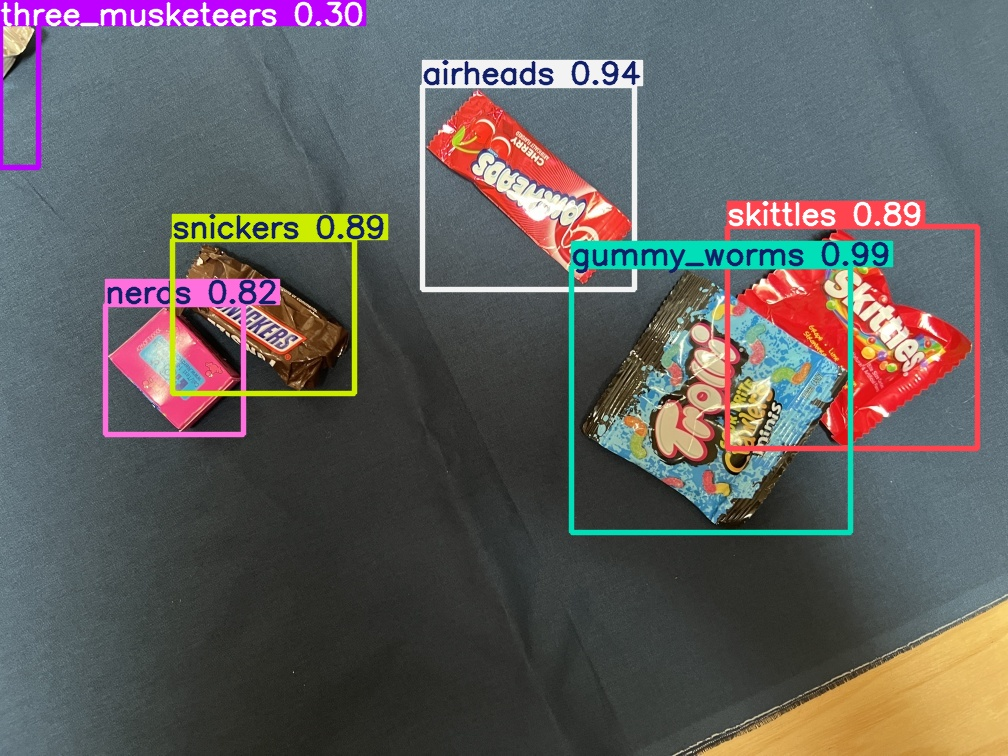

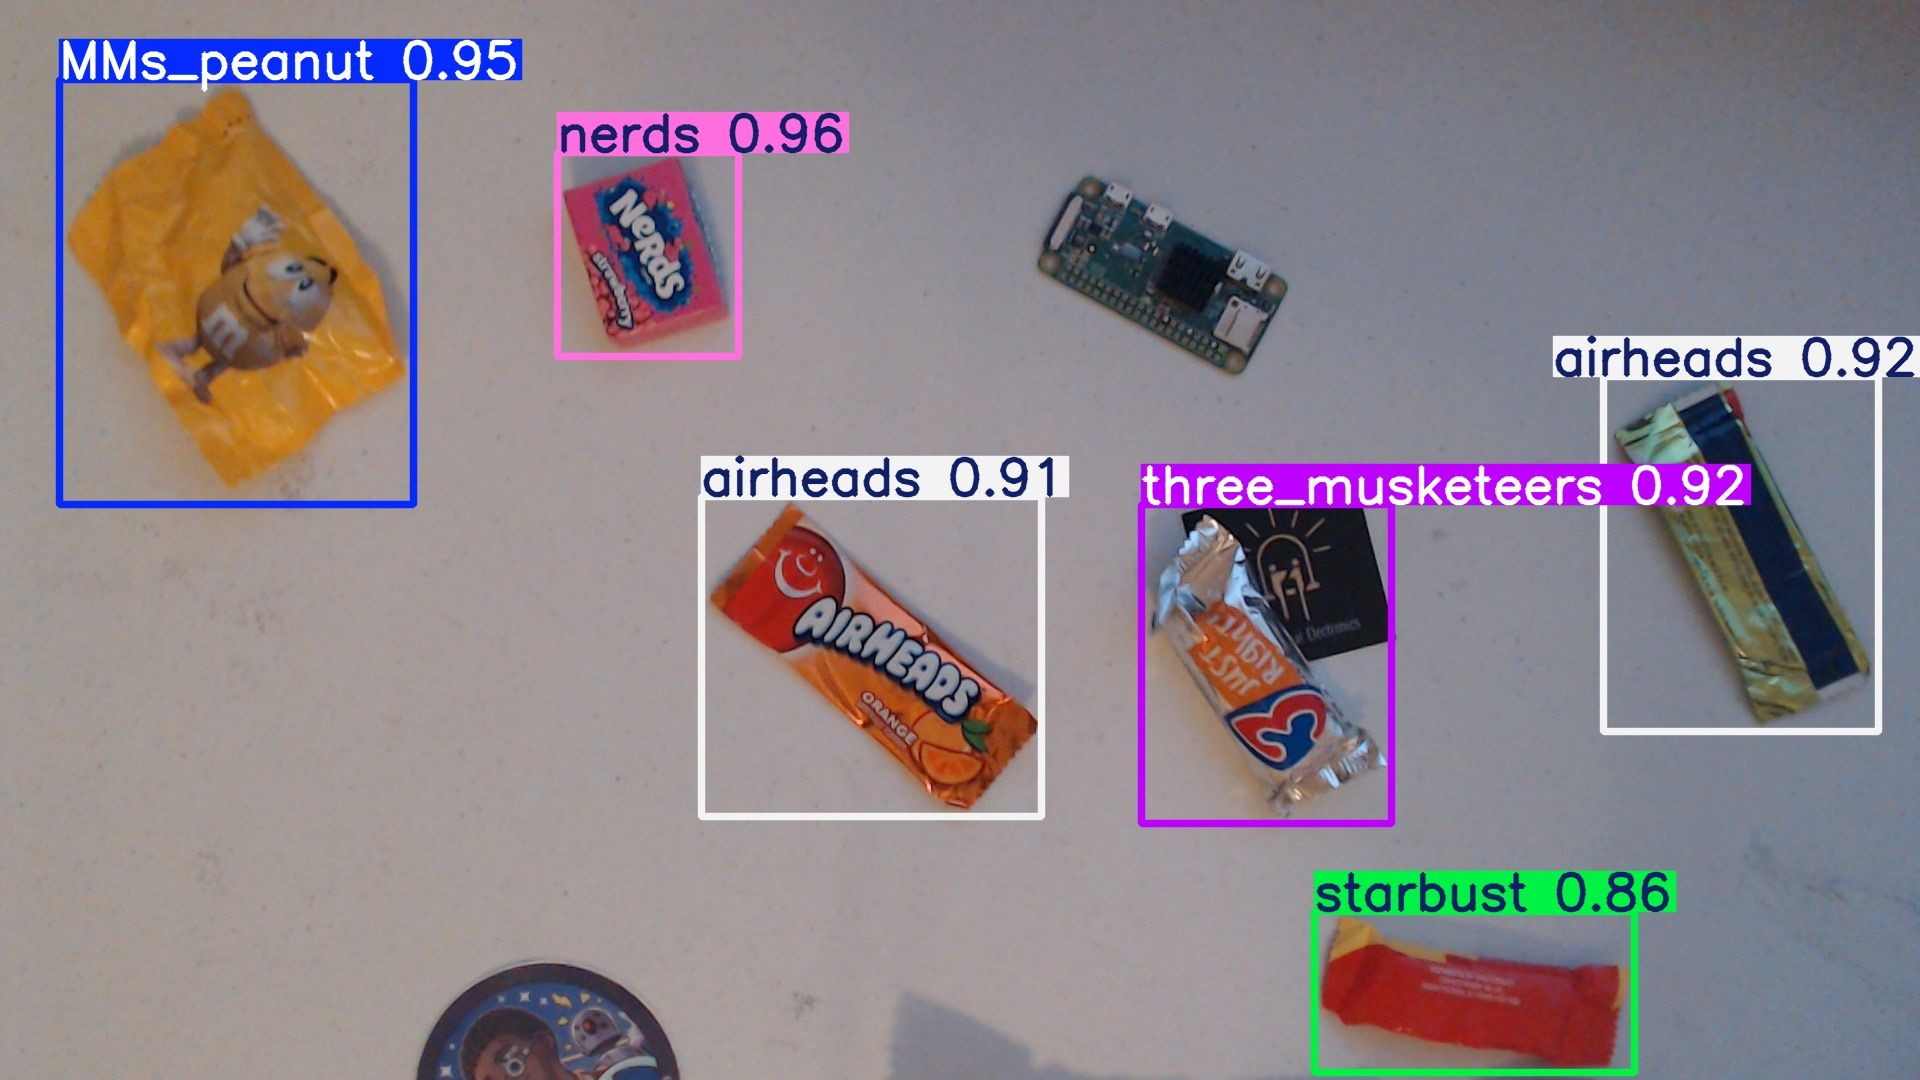

In [18]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:2]:
  display(Image(filename=image_path, height=400))
  print('\n')


- Displays sample prediction images with annotated bounding boxes.
- Useful for spotting visual detection successes and failure cases.

## 10. Summary & Recommendations

- A complete, reproducible YOLOv8 pipeline for candy detection was built and successfully executed.
- Training achieved nearly 99% mAP@0.5, with consistent results across all 11 candy classes.
- Dataset preparation with train-val split and auto YAML configuration was automated.
- Fast inference demonstrates the model's applicability for real-time or near-real-time detection.

### Recommendations:

- Evaluate on a larger or more diverse independent test set to ensure generalizability.
- Use data augmentation or k-fold cross-validation for robustness.
- Experiment with larger YOLO versions or hyperparameter tuning to potentially improve further.


In [19]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/BoxPR_curve.png (deflated 18%)
  adding: train/BoxP_curve.png (deflated 9%)
  adding: train/args.yaml (deflated 53%)
  adding: train/results.png (deflated 7%)
  adding: train/confusion_matrix_normalized.png (deflated 20%)
  adding: train/results.csv (deflated 63%)
  adding: train/labels.jpg (deflated 29%)
  adding: train/BoxF1_curve.png (deflated 6%)
  adding: train/labels_correlogram.jpg (deflated 43%)
  adding: train/train_batch0.jpg (deflated 4%)
  adding: train/confusion_matrix.png (deflated 22%)
  adding: train/val_batch0_labels.jpg (deflated 8%)
  adding: train/train_batch501.jpg (deflated 13%)
  adding: train/BoxR_curve.png (deflated 10%)
  adding: train/val_batch0_pred.jpg (deflated 8%)
  adding: train/train_batch500.jpg (deflated 9%)
  adding: train/train_batch2.jpg (deflated 5%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/we

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

##  Deploy YOLO Model on Local Devices

Next, we'll take our downloaded model and run it on a local device. This section provides instructions showing how to deploy YOLO models on various devices.

I wrote a basic Python script, `yolo_detect3.py`, that shows how to load a model, run inference on an image source, parse the inference results, and display boxes around each detected class in the image. The [yolo_detect3.py](https://github.com/AfsarRasheed/yolo/blob/main/yolo_detect3.py(working%20model)) gives an example of how to work with Ultralytics YOLO models in Python, and it can be used as a starting point for more advanced applications.

###  Deploy on PC (Windows, Linux, or macOS)

The easiest way to run Ultralytics models on a PC is using Anaconda. Anaconda sets up a virtual Python environment and allows you to easily install Ultralytics and PyTorch. It automatically installs CUDA and cuDNN, which allows you to speed up model inference with your NVIDIA GPU.


**1. Download and Install Anaconda**

Go to the Anaconda download page at https://anaconda.com/download, click the “skip registration” button, and then download the package for your OS. When it's finished downloading, run the installer and click through the installation steps. You can use the default options for installation.

**2. Set up virtual environment**

Once it's installed, run Anaconda Prompt from the Start Bar. (If you're on macOS or Linux, just open a command terminal).

Issue the following commands to create a new Python environment and activate it:

```
conda create --name yolo-env1 python=3.12 -y
conda activate yolo-env1
```

Install Ultralytics (which also installs import libraries like OpenCV-Python, Numpy, and PyTorch) by issuing the following command:

```
pip install ultralytics
```

If you have an NVIDIA GPU, you can install the GPU-enabled version of PyTorch by issuing the following command:

```
pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
```

**3. Extract downloaded model**
Take the `my_model.zip` file you downloaded  and unzip it to a folder on your PC. In the Anaconda Prompt terminal, move into the unzipped folder using:

```
cd path/to/folder  C:\Users\OMEN\Documents\yolo\my_model
```

**4. Download and run yolo_detect3.py**

Download the `yolo_detect3.py` script into the `my_model` folder using:

```
curl -o yolo_detect.py https://raw.githubusercontent.com/AfsarRasheed/yolo/refs/heads/main/yolo_detect3.py(working%20model)
```

Alright! We're ready to run the script. To run inference with a yolov8s model on a USB camera at 1280x720 resolution, issue:

```
python yolo_detect3.py --model my_model.pt --source usb0 --resolution 1280x720
```

A window will appear showing a live feed from your webcam with boxes drawn around detected objects in each frame.